# Compare Social Maps (Topics 145 & 154) with Narrative Map (Topic 100)

- Visualize overlay of maps from the social submodel and the topic 100 map from the narrative culture & ideation bias submodel
- Uses the FDR-corrected maps downloaded from the Neurosynth website instead of unthresholded maps
- Overlay map (Red for 2 narratve maps, Blue for 2 Social Maps) 

In [1]:
%pylab inline
from nilearn import surface
from nilearn import datasets
from nilearn import plotting
from nilearn import image
import os
import pylab as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
fsaverage = datasets.fetch_surf_fsaverage(mesh='fsaverage5')

In [18]:
# Narrative
#define culture & ideation bias map (topic 100, gestures, abstract, race)
gar_path = 'social_maps/v5-topics-200_100_gestures_abstract_race_association-test_z_FDR_0.01.nii.gz'
gar = image.load_img(gar_path) 
gar_surf_R = surface.vol_to_surf(gar, fsaverage.pial_right)
gar_surf_L = surface.vol_to_surf(gar, fsaverage.pial_left)

#define culture & ideation bias map (topic 30, events, future)
evp_path = 'social_maps/v5-topics-200_30_events_future_personal_association-test_z_FDR_0.01.nii.gz'
evp = image.load_img(evp_path) 
evp_surf_R = surface.vol_to_surf(evp, fsaverage.pial_right)
evp_surf_L = surface.vol_to_surf(evp, fsaverage.pial_left)


# Social
#define moral judgment social map (topic 145, mind,mental,social)
mms_path = 'social_maps/v5-topics-200_145_mind_mental_social_association-test_z_FDR_0.01.nii.gz'
mms = image.load_img(mms_path) 
mms_surf_R = surface.vol_to_surf(mms, fsaverage.pial_right)
mms_surf_L = surface.vol_to_surf(mms, fsaverage.pial_left)

#define moral judgment social map (topic 154, social interactions)
si_path = 'social_maps/v5-topics-200_154_social_interactions_interaction_association-test_z_FDR_0.01.nii.gz'
si = image.load_img(si_path) 
si_surf_R = surface.vol_to_surf(si, fsaverage.pial_right)
si_surf_L = surface.vol_to_surf(si, fsaverage.pial_left)


### Summed Maps (Culture & Ideation Bias = 100 + 30; Social = 145 + 154)

In [23]:
# Narrative
#define culture & ideation bias map (topic 100, gestures, abstract, race)
cib_path = 'social_maps/social_topic_maps_cib_sum.nii.gz'
cib = image.load_img(cib_path) 
cib_surf_R = surface.vol_to_surf(cib, fsaverage.pial_right)
cib_surf_L = surface.vol_to_surf(cib, fsaverage.pial_left)

# Social-Affective
#define social map (topic 145, mind,mental,social)
social_path = 'social_maps/social_topic_maps_social_sum.nii.gz'
social = image.load_img(social_path) 
social_surf_R = surface.vol_to_surf(social, fsaverage.pial_right)
social_surf_L = surface.vol_to_surf(social, fsaverage.pial_left)

# Left Hemisphere Render

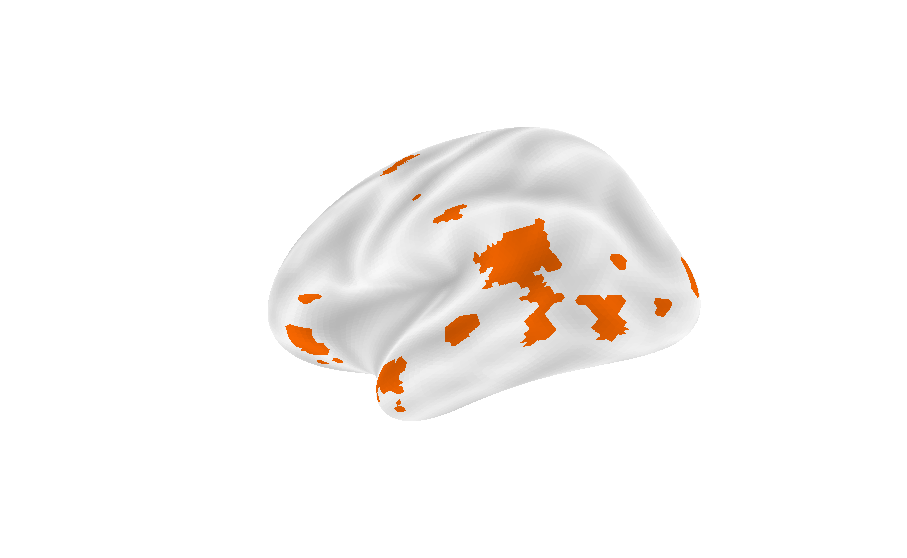

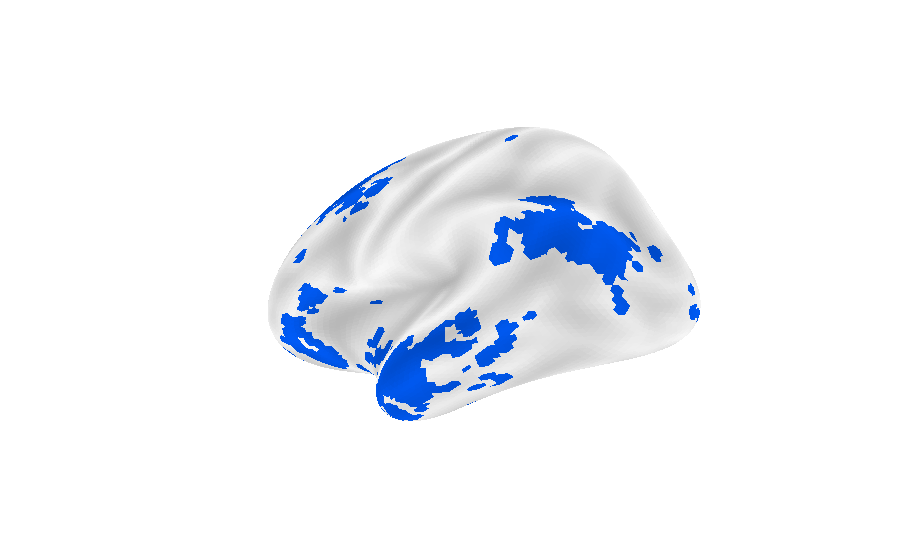

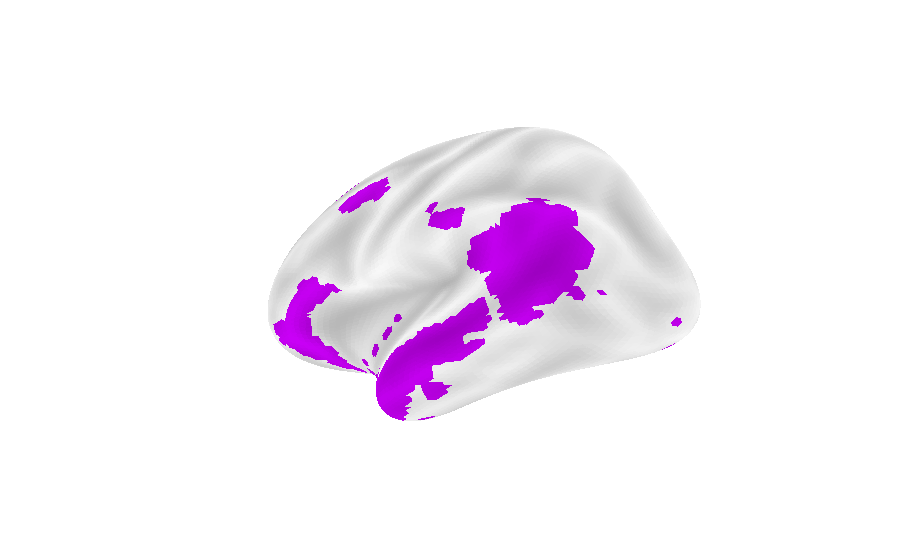

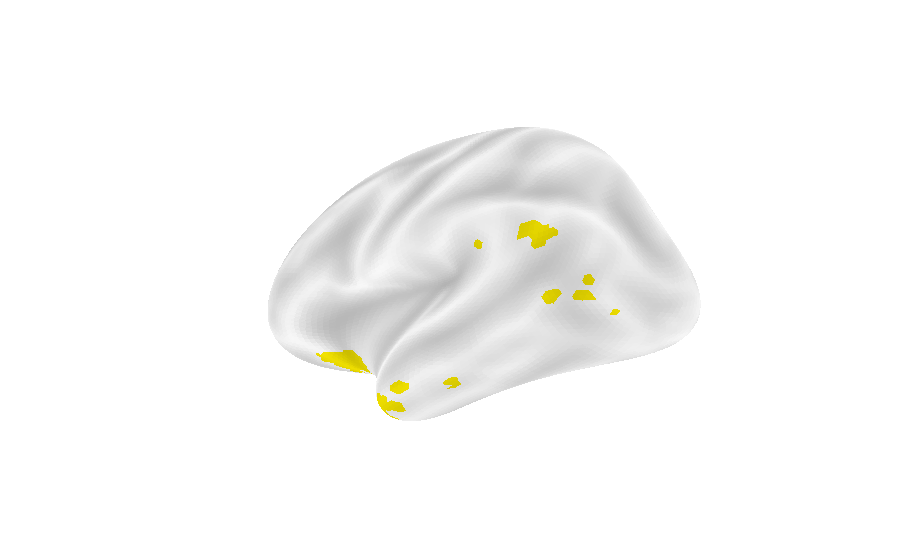

In [24]:
#build single surface with all maps
maps = [gar_surf_L, evp_surf_L, mms_surf_L, si_surf_L]
cmaps = ['#ff8d3c','#3c84ff','#db3cff','#fff23c']


for i in range(len(maps)):
    plt.rcParams["figure.figsize"] = [16, 10.]
    plt.rcParams["figure.subplot.wspace"] = 0.01
    figR, figR_axes = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
    elev = 0.
    azim = 195.#195.#-15. 
    figR_axes.view_init(elev=elev, azim=azim)
    figR_axes.set_axis_off()

    
    #derived from plot_surf in nilearn
    #specify mesh base
    mesh = surface.load_surf_mesh(fsaverage['infl_left'])
    coords, faces = mesh[0], mesh[1] #coords are 3-d coords of vertices, faces are 3 indices into the coords defining a triangle in 3-D space
    limits = [coords.min(), coords.max()]
    alpha = 1.0
    face_colors = np.ones((faces.shape[0], 4))
    
    #plot uncolored surface
    p3dcollec = figR_axes.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0., 
                              antialiased=False, color='white')
    #load bg map 
    bg_data = surface.load_surf_data(fsaverage['sulc_left'])
    bg_faces = np.mean(bg_data[faces], axis=1)
    bg_faces = bg_faces - bg_faces.min()
    bg_faces = bg_faces / bg_faces.max()
    bg_faces *= 0.3 #compress range to limit darkness
    face_colors = plt.cm.gray_r(bg_faces)

    surf_face_colors = np.zeros_like(face_colors)
    surf_map_data = surface.load_surf_data(maps[i]) #data for each vertex (3-D locations in coords, len=coords)
    surf_map_faces = np.mean(surf_map_data[faces], axis=1)  #average of data values from the 3 defining vertices (len=faces)
    vmin = 0. #np.nanmin(surf_map_faces)
    vmax = 0.01 #np.nanmax(surf_map_faces)
    surf_map_faces = surf_map_faces - vmin
    #surf_map_faces = surf_map_faces / (vmax - vmin)
    floor_inds = np.where(np.abs(surf_map_faces) < 0.1)
    surf_map_faces[floor_inds] = 0.0
    cap_inds = np.where(np.abs(surf_map_faces) >= 0.01)
    surf_map_faces[cap_inds] = 1.0
    kept_indices = np.where(np.abs(surf_map_faces) >= 0.0)[0]
    #cmap = plt.cm.get_cmap(cmaps[i]) #get cmap for this neuromap by cmaps string
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", cmaps[i]])
    try: 
        surf_face_colors[kept_indices] +=  cmap(surf_map_faces[kept_indices])
    except: 
        surf_face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
    surf_face_colors -= surf_face_colors.min()
    surf_face_colors /= surf_face_colors.max()


    #add background
    face_colors *= surf_face_colors 

    #set face colors in figure
    p3dcollec.set_facecolors(face_colors)
    plt.savefig('social_maps/social_maps_Left_'+str(i)+'.png', dpi=300)


## Render all maps on same surface - lateral surface

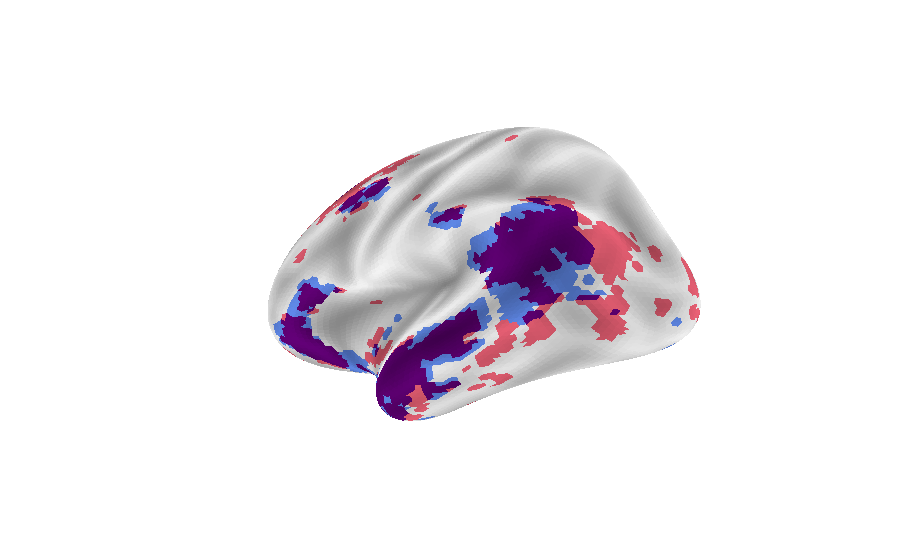

In [25]:
#build single surface with all maps
maps = [cib_surf_L, social_surf_L]
#cmaps = ['red','blue']
cmaps = ['#ff3755','#3773ff']

#derived from plot_surf in nilearn
#specify mesh base
mesh = surface.load_surf_mesh(fsaverage['infl_left'])
coords, faces = mesh[0], mesh[1] #coords are 3-d coords of vertices, faces are 3 indices into the coords defining a triangle in 3-D space
limits = [coords.min(), coords.max()]
elev = 0.
azim = 195. #195. 
alpha = 1.0
face_colors = np.ones((faces.shape[0], 4))

#specify figure 
plt.rcParams["figure.figsize"] = [16,10]
fig2R, fig2R_axes = plt.subplots(1,1, subplot_kw={'projection': '3d'})
fig2R_axes.view_init(elev=elev, azim=azim)
fig2R_axes.set_axis_off()

#plot uncolored surface
p3dcollec = fig2R_axes.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0., 
                              antialiased=False, color='white')
#load bg map 
bg_data = surface.load_surf_data(fsaverage['sulc_left'])
bg_faces = np.mean(bg_data[faces], axis=1)
bg_faces = bg_faces - bg_faces.min()
bg_faces = bg_faces / bg_faces.max()
bg_faces *= 0.5 #compress range to limit darkness
face_colors = plt.cm.gray_r(bg_faces)


surf_face_colors = np.zeros_like(face_colors)
for i in range(len(maps)):
    surf_map_data = surface.load_surf_data(maps[i]) #data for each vertex (3-D locations in coords, len=coords)
    surf_map_faces = np.mean(surf_map_data[faces], axis=1)  #average of data values from the 3 defining vertices (len=faces)
    vmin = 0. #np.nanmin(surf_map_faces)
    vmax = 0.01 #np.nanmax(surf_map_faces)
    surf_map_faces = surf_map_faces - vmin
    #surf_map_faces = surf_map_faces / (vmax - vmin)
    floor_inds = np.where(np.abs(surf_map_faces) < 0.1)
    surf_map_faces[floor_inds] = 0.0
    cap_inds = np.where(np.abs(surf_map_faces) >= 0.01)
    surf_map_faces[cap_inds] = 1.0
    kept_indices = np.where(np.abs(surf_map_faces) >= 0.0)[0]
    #cmap = plt.cm.get_cmap(cmaps[i]) #get cmap for this neuromap by cmaps string
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", cmaps[i]])
    try: 
        surf_face_colors[kept_indices] +=  cmap(surf_map_faces[kept_indices])
    except: 
        surf_face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
surf_face_colors -= surf_face_colors.min()
surf_face_colors /= surf_face_colors.max()


#add background
face_colors *= surf_face_colors 

#range correct
#face_colors -= face_colors.min()
#face_colors /= face_colors.max()
#cap at 1 
#cap_inds = np.where(np.abs(face_colors) >= 1.0)
#face_colors[cap_inds] = 1.0 

#set face colors in figure
p3dcollec.set_facecolors(face_colors)
plt.savefig('social_maps/social_maps_Left_Lateral.png', dpi=300)




## Render all maps on same surface - medial surface

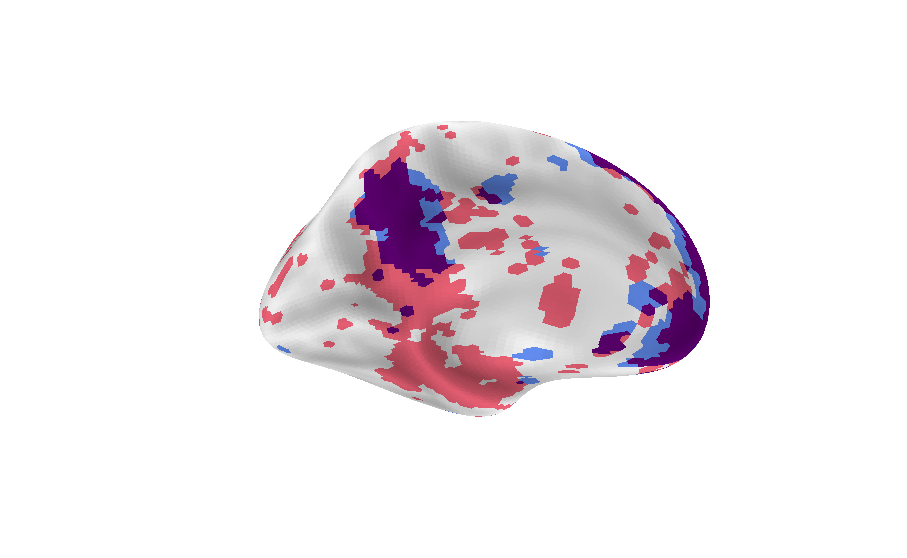

In [26]:
#build single surface with all maps
maps = [cib_surf_L, social_surf_L]
#cmaps = ['red', 'blue' ]
cmaps = ['#ff3755','#3773ff']

#derived from plot_surf in nilearn
#specify mesh base
mesh = surface.load_surf_mesh(fsaverage['infl_left'])
coords, faces = mesh[0], mesh[1] #coords are 3-d coords of vertices, faces are 3 indices into the coords defining a triangle in 3-D space
limits = [coords.min(), coords.max()]
elev = 0.
azim = -15. #195. 
alpha = 1.0
face_colors = np.ones((faces.shape[0], 4))

#specify figure 
plt.rcParams["figure.figsize"] = [16,10]
fig2R, fig2R_axes = plt.subplots(1,1, subplot_kw={'projection': '3d'})
fig2R_axes.view_init(elev=elev, azim=azim)
fig2R_axes.set_axis_off()

#plot uncolored surface
p3dcollec = fig2R_axes.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0., 
                              antialiased=False, color='white')
#load bg map 
bg_data = surface.load_surf_data(fsaverage['sulc_left'])
bg_faces = np.mean(bg_data[faces], axis=1)
bg_faces = bg_faces - bg_faces.min()
bg_faces = bg_faces / bg_faces.max()
bg_faces *= 0.5 #compress range to limit darkness
face_colors = plt.cm.gray_r(bg_faces)


surf_face_colors = np.zeros_like(face_colors)
for i in range(len(maps)):
    surf_map_data = surface.load_surf_data(maps[i]) #data for each vertex (3-D locations in coords, len=coords)
    surf_map_faces = np.mean(surf_map_data[faces], axis=1)  #average of data values from the 3 defining vertices (len=faces)
    vmin = 0. #np.nanmin(surf_map_faces)
    vmax = 0.01 #np.nanmax(surf_map_faces)
    surf_map_faces = surf_map_faces - vmin
    #surf_map_faces = surf_map_faces / (vmax - vmin)
    floor_inds = np.where(np.abs(surf_map_faces) < 0.1)
    surf_map_faces[floor_inds] = 0.0
    cap_inds = np.where(np.abs(surf_map_faces) >= 0.01)
    surf_map_faces[cap_inds] = 1.0
    kept_indices = np.where(np.abs(surf_map_faces) >= 0.0)[0]
    #cmap = plt.cm.get_cmap(cmaps[i]) #get cmap for this neuromap by cmaps string
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", cmaps[i]])
    try: 
        surf_face_colors[kept_indices] +=  cmap(surf_map_faces[kept_indices])
    except: 
        surf_face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
surf_face_colors -= surf_face_colors.min()
surf_face_colors /= surf_face_colors.max()


#add background
face_colors *= surf_face_colors 

#range correct
#face_colors -= face_colors.min()
#face_colors /= face_colors.max()
#cap at 1 
#cap_inds = np.where(np.abs(face_colors) >= 1.0)
#face_colors[cap_inds] = 1.0 

#set face colors in figure
p3dcollec.set_facecolors(face_colors)
plt.savefig('social_maps/social_maps_Left_Medial.png', dpi=300)


# Right Hemisphere Render

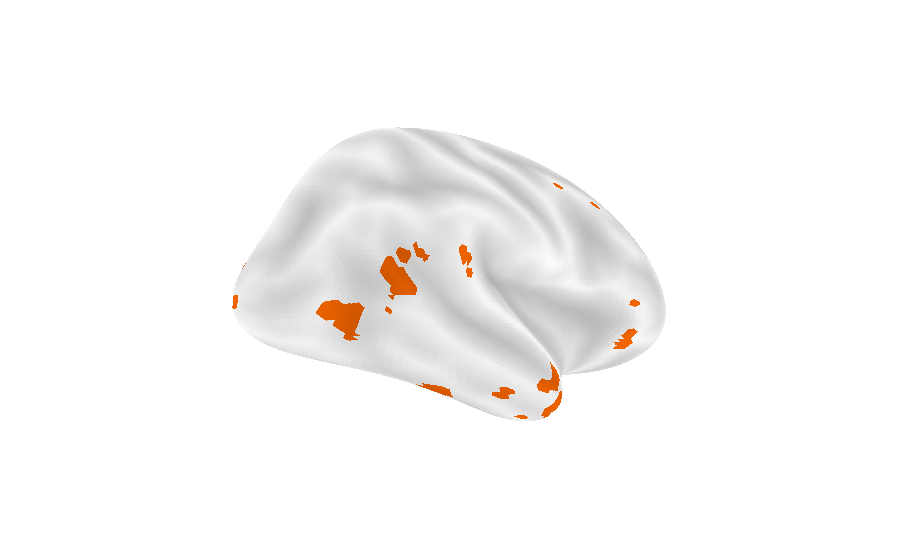

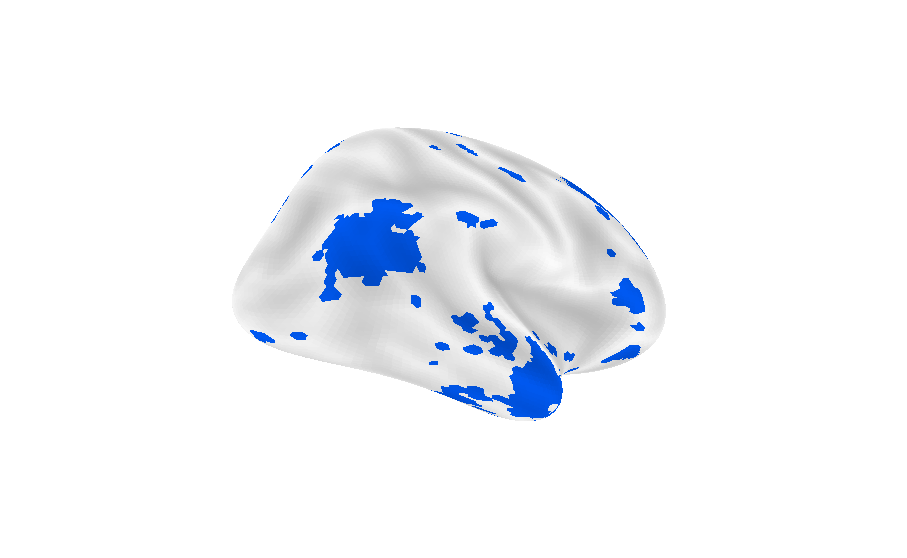

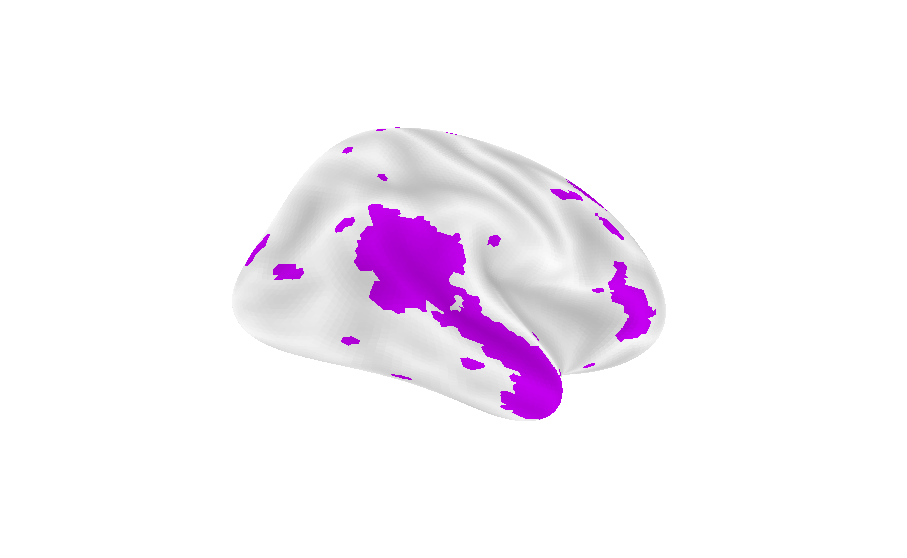

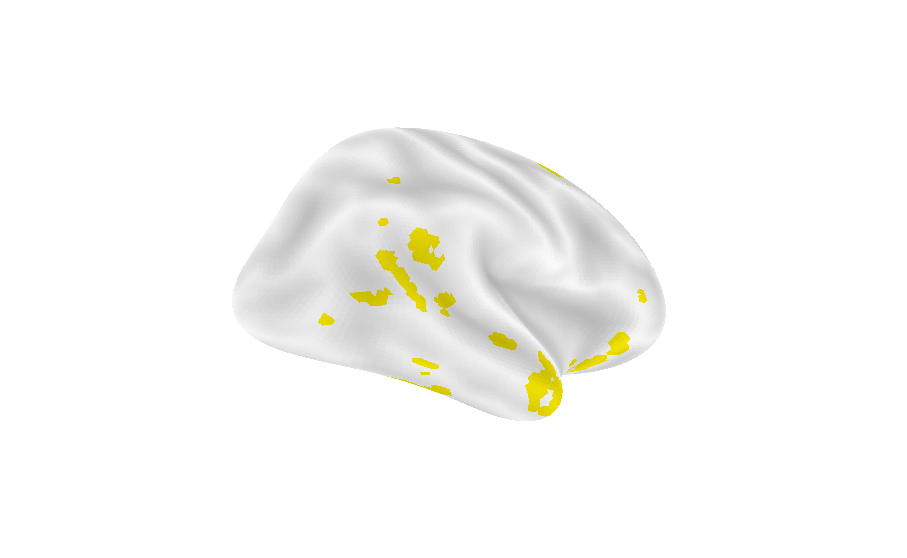

In [27]:
#build single surface with all maps
maps = [gar_surf_R, evp_surf_R, mms_surf_R, si_surf_R]
cmaps = ['#ff8d3c','#3c84ff','#db3cff','#fff23c']

for i in range(len(maps)):
    plt.rcParams["figure.figsize"] = [16, 10.]
    plt.rcParams["figure.subplot.wspace"] = 0.01
    figR, figR_axes = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
    elev = 0.
    azim = -15.#195.#-15. 
    figR_axes.view_init(elev=elev, azim=azim)
    figR_axes.set_axis_off()

    
    #derived from plot_surf in nilearn
    #specify mesh base
    mesh = surface.load_surf_mesh(fsaverage['infl_right'])
    coords, faces = mesh[0], mesh[1] #coords are 3-d coords of vertices, faces are 3 indices into the coords defining a triangle in 3-D space
    limits = [coords.min(), coords.max()]
    alpha = 1.0
    face_colors = np.ones((faces.shape[0], 4))
    
    #plot uncolored surface
    p3dcollec = figR_axes.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0., 
                              antialiased=False, color='white')
    #load bg map 
    bg_data = surface.load_surf_data(fsaverage['sulc_right'])
    bg_faces = np.mean(bg_data[faces], axis=1)
    bg_faces = bg_faces - bg_faces.min()
    bg_faces = bg_faces / bg_faces.max()
    bg_faces *= 0.3 #compress range to limit darkness
    face_colors = plt.cm.gray_r(bg_faces)

    surf_face_colors = np.zeros_like(face_colors)
    surf_map_data = surface.load_surf_data(maps[i]) #data for each vertex (3-D locations in coords, len=coords)
    surf_map_faces = np.mean(surf_map_data[faces], axis=1)  #average of data values from the 3 defining vertices (len=faces)
    vmin = 0. #np.nanmin(surf_map_faces)
    vmax = 0.01 #np.nanmax(surf_map_faces)
    surf_map_faces = surf_map_faces - vmin
    #surf_map_faces = surf_map_faces / (vmax - vmin)
    floor_inds = np.where(np.abs(surf_map_faces) < 0.1)
    surf_map_faces[floor_inds] = 0.0
    cap_inds = np.where(np.abs(surf_map_faces) >= 0.01)
    surf_map_faces[cap_inds] = 1.0
    kept_indices = np.where(np.abs(surf_map_faces) >= 0.0)[0]
    #cmap = plt.cm.get_cmap(cmaps[i]) #get cmap for this neuromap by cmaps string
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", cmaps[i]])
    try: 
        surf_face_colors[kept_indices] +=  cmap(surf_map_faces[kept_indices])
    except: 
        surf_face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
    surf_face_colors -= surf_face_colors.min()
    surf_face_colors /= surf_face_colors.max()


    #add background
    face_colors *= surf_face_colors 

    #set face colors in figure
    p3dcollec.set_facecolors(face_colors)
    plt.savefig('social_maps/social_maps_Right_'+str(i)+'.png', dpi=300)


## Render all maps on the same brain - Lateral surface

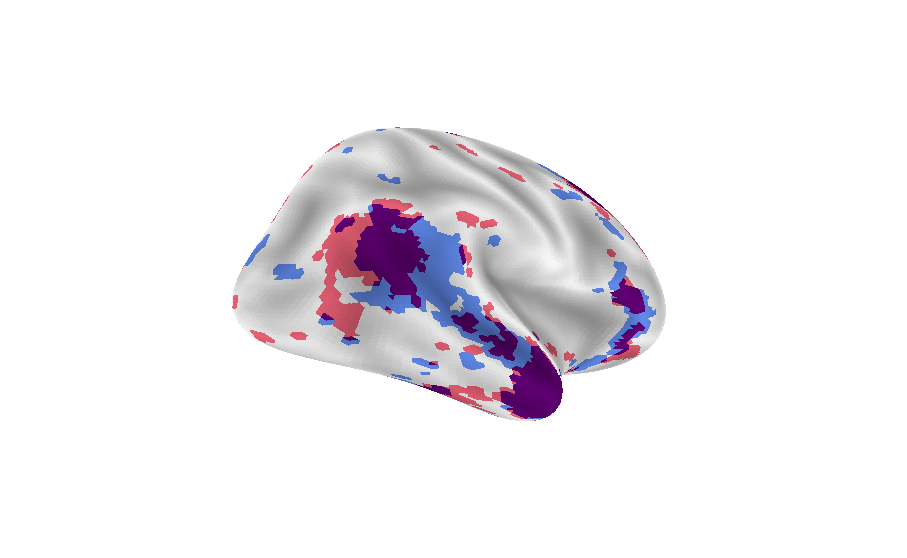

In [28]:
#build single surface with all maps
maps = [cib_surf_R, social_surf_R]
#cmaps = ['red', 'blue' ]
cmaps = ['#ff3755','#3773ff']

#derived from plot_surf in nilearn
#specify mesh base
mesh = surface.load_surf_mesh(fsaverage['infl_right'])
coords, faces = mesh[0], mesh[1] #coords are 3-d coords of vertices, faces are 3 indices into the coords defining a triangle in 3-D space
limits = [coords.min(), coords.max()]
elev = 0.
azim = -15. #195. 
alpha = 1.0
face_colors = np.ones((faces.shape[0], 4))

#specify figure 
plt.rcParams["figure.figsize"] = [16,10]
fig2R, fig2R_axes = plt.subplots(1,1, subplot_kw={'projection': '3d'})
fig2R_axes.view_init(elev=elev, azim=azim)
fig2R_axes.set_axis_off()

#plot uncolored surface
p3dcollec = fig2R_axes.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0., 
                              antialiased=False, color='white')
#load bg map 
bg_data = surface.load_surf_data(fsaverage['sulc_right'])
bg_faces = np.mean(bg_data[faces], axis=1)
bg_faces = bg_faces - bg_faces.min()
bg_faces = bg_faces / bg_faces.max()
bg_faces *= 0.5 #compress range to limit darkness
face_colors = plt.cm.gray_r(bg_faces)


surf_face_colors = np.zeros_like(face_colors)
for i in range(len(maps)):
    surf_map_data = surface.load_surf_data(maps[i]) #data for each vertex (3-D locations in coords, len=coords)
    surf_map_faces = np.mean(surf_map_data[faces], axis=1)  #average of data values from the 3 defining vertices (len=faces)
    vmin = 0. #np.nanmin(surf_map_faces)
    vmax = 0.01 #np.nanmax(surf_map_faces)
    surf_map_faces = surf_map_faces - vmin
    #surf_map_faces = surf_map_faces / (vmax - vmin)
    floor_inds = np.where(np.abs(surf_map_faces) < 0.1)
    surf_map_faces[floor_inds] = 0.0
    cap_inds = np.where(np.abs(surf_map_faces) >= 0.01)
    surf_map_faces[cap_inds] = 1.0
    kept_indices = np.where(np.abs(surf_map_faces) >= 0.0)[0]
    #cmap = plt.cm.get_cmap(cmaps[i]) #get cmap for this neuromap by cmaps string
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", cmaps[i]])
    try: 
        surf_face_colors[kept_indices] +=  cmap(surf_map_faces[kept_indices])
    except: 
        surf_face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
surf_face_colors -= surf_face_colors.min()
surf_face_colors /= surf_face_colors.max()


#add background
face_colors *= surf_face_colors 

#range correct
#face_colors -= face_colors.min()
#face_colors /= face_colors.max()
#cap at 1 
#cap_inds = np.where(np.abs(face_colors) >= 1.0)
#face_colors[cap_inds] = 1.0 

#set face colors in figure
p3dcollec.set_facecolors(face_colors)
plt.savefig('social_maps/social_maps_Right_Lateral.png', dpi=300)




## Render all maps on the same brain - Medial surface

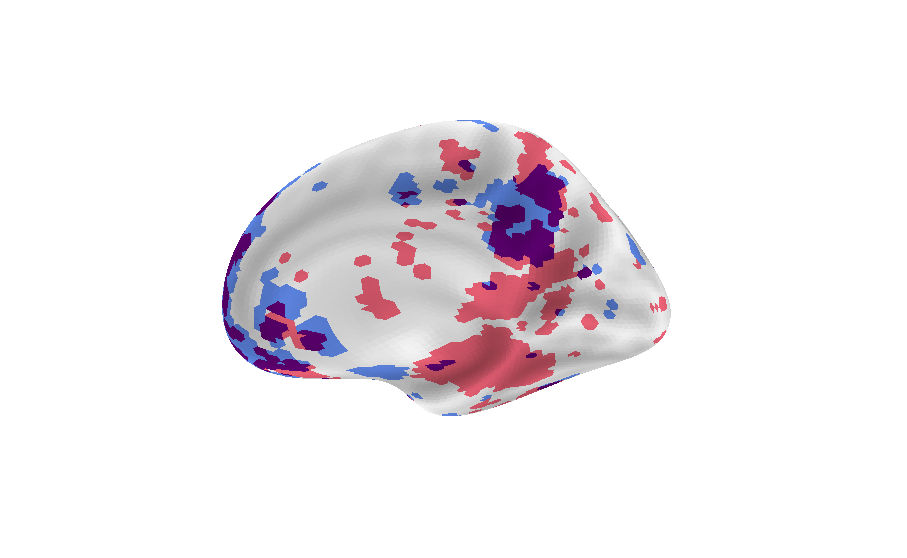

In [29]:
#build single surface with all maps
maps = [cib_surf_R, social_surf_R]
#cmaps = ['red', 'blue' ]
cmaps = ['#ff3755','#3773ff']

#derived from plot_surf in nilearn
#specify mesh base
mesh = surface.load_surf_mesh(fsaverage['infl_right'])
coords, faces = mesh[0], mesh[1] #coords are 3-d coords of vertices, faces are 3 indices into the coords defining a triangle in 3-D space
limits = [coords.min(), coords.max()]
elev = 0.
azim = 195. #195. 
alpha = 1.0
face_colors = np.ones((faces.shape[0], 4))

#specify figure 
plt.rcParams["figure.figsize"] = [16,10]
fig2R, fig2R_axes = plt.subplots(1,1, subplot_kw={'projection': '3d'})
fig2R_axes.view_init(elev=elev, azim=azim)
fig2R_axes.set_axis_off()

#plot uncolored surface
p3dcollec = fig2R_axes.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0., 
                              antialiased=False, color='white')
#load bg map 
bg_data = surface.load_surf_data(fsaverage['sulc_right'])
bg_faces = np.mean(bg_data[faces], axis=1)
bg_faces = bg_faces - bg_faces.min()
bg_faces = bg_faces / bg_faces.max()
bg_faces *= 0.5 #compress range to limit darkness
face_colors = plt.cm.gray_r(bg_faces)


surf_face_colors = np.zeros_like(face_colors)
for i in range(len(maps)):
    surf_map_data = surface.load_surf_data(maps[i]) #data for each vertex (3-D locations in coords, len=coords)
    surf_map_faces = np.mean(surf_map_data[faces], axis=1)  #average of data values from the 3 defining vertices (len=faces)
    vmin = 0. #np.nanmin(surf_map_faces)
    vmax = 0.01 #np.nanmax(surf_map_faces)
    surf_map_faces = surf_map_faces - vmin
    #surf_map_faces = surf_map_faces / (vmax - vmin)
    floor_inds = np.where(np.abs(surf_map_faces) < 0.1)
    surf_map_faces[floor_inds] = 0.0
    cap_inds = np.where(np.abs(surf_map_faces) >= 0.01)
    surf_map_faces[cap_inds] = 1.0
    kept_indices = np.where(np.abs(surf_map_faces) >= 0.0)[0]
    #cmap = plt.cm.get_cmap(cmaps[i]) #get cmap for this neuromap by cmaps string
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", cmaps[i]])
    try: 
        surf_face_colors[kept_indices] +=  cmap(surf_map_faces[kept_indices])
    except: 
        surf_face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
surf_face_colors -= surf_face_colors.min()
surf_face_colors /= surf_face_colors.max()


#add background
face_colors *= surf_face_colors 

#range correct
#face_colors -= face_colors.min()
#face_colors /= face_colors.max()
#cap at 1 
#cap_inds = np.where(np.abs(face_colors) >= 1.0)
#face_colors[cap_inds] = 1.0 

#set face colors in figure
p3dcollec.set_facecolors(face_colors)
plt.savefig('social_maps/social_maps_Right_Medial.png', dpi=300)




## Axial slices

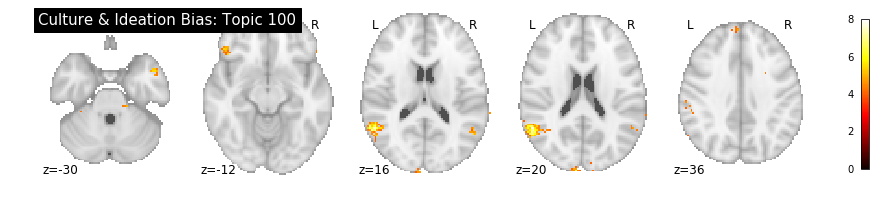

In [10]:
plotting.plot_stat_map(cib, display_mode='z',  cut_coords=[-30, -12, 16, 20, 36],
                       title="Culture & Ideation Bias: Topic 100")

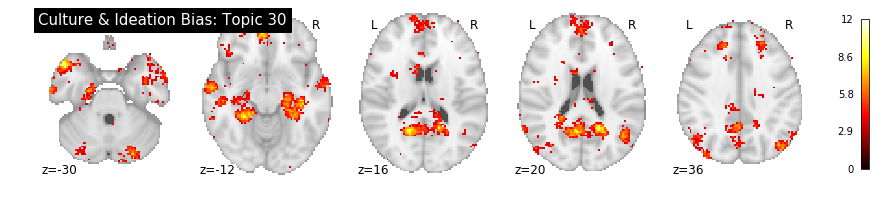

In [11]:
plotting.plot_stat_map(evp, display_mode='z',  cut_coords=[-30, -12, 16, 20, 36],
                       title="Culture & Ideation Bias: Topic 30")

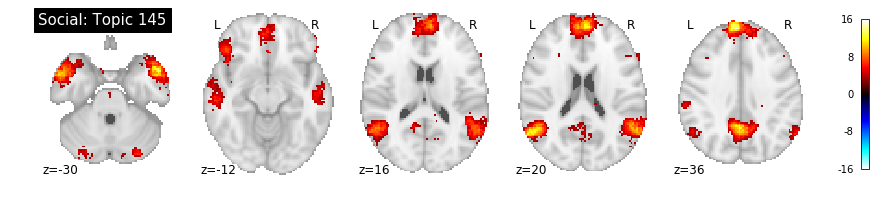

In [12]:
plotting.plot_stat_map(mms, display_mode='z', cut_coords=[-30, -12, 16, 20, 36],
                       title="Social: Topic 145")

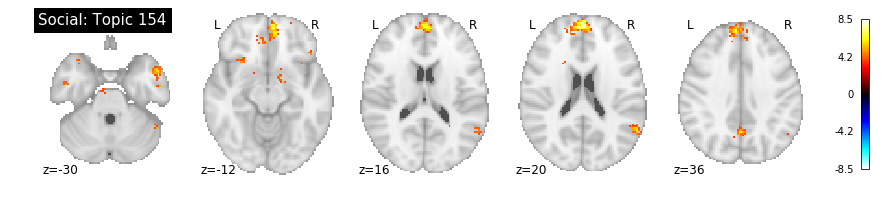

In [13]:
plotting.plot_stat_map(si, display_mode='z', cut_coords=[-30, -12, 16, 20, 36],
                       title="Social: Topic 154")